In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#Checking the dataset by using pandas functions to understand what I am working on

df = pd.read_excel("/Users/kushagrabhatia/Documents/Python Refresher/data challenge/full_application_dataset.xlsx")

# Basic info about columns and data types
df.info()

# Quick statistical summary (only numeric columns)
df.describe()

# Check the columns
print("Columns in the DataFrame:", df.columns.tolist())

# Check for missing data
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   application_id        10000 non-null  int64  
 1   candidate_id          10000 non-null  int64  
 2   job_id                10000 non-null  int64  
 3   referred              10000 non-null  int64  
 4   gender                10000 non-null  object 
 5   ethnicity             10000 non-null  object 
 6   education_level       10000 non-null  object 
 7   age                   10000 non-null  int64  
 8   university_rank       10000 non-null  object 
 9   years_experience      10000 non-null  int64  
 10  ai_screening          10000 non-null  int64  
 11  recruiter_id          2186 non-null   float64
 12  rec_screening         2186 non-null   float64
 13  rec_gender            2186 non-null   object 
 14  rec_ethnicity         2186 non-null   object 
 15  rec_age             

application_id             0
candidate_id               0
job_id                     0
referred                   0
gender                     0
ethnicity                  0
education_level            0
age                        0
university_rank            0
years_experience           0
ai_screening               0
recruiter_id            7814
rec_screening           7814
rec_gender              7814
rec_ethnicity           7814
rec_age                 7814
tech_interview_score    9234
tech_screening          9234
management_screening    9895
dtype: int64

In [4]:
filtered_rec_screening_df = df[df['rec_screening'].notnull()].drop(columns=['ai_screening','tech_interview_score','tech_screening','management_screening'])

filtered_rec_screening_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2186 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   application_id    2186 non-null   int64  
 1   candidate_id      2186 non-null   int64  
 2   job_id            2186 non-null   int64  
 3   referred          2186 non-null   int64  
 4   gender            2186 non-null   object 
 5   ethnicity         2186 non-null   object 
 6   education_level   2186 non-null   object 
 7   age               2186 non-null   int64  
 8   university_rank   2186 non-null   object 
 9   years_experience  2186 non-null   int64  
 10  recruiter_id      2186 non-null   float64
 11  rec_screening     2186 non-null   float64
 12  rec_gender        2186 non-null   object 
 13  rec_ethnicity     2186 non-null   object 
 14  rec_age           2186 non-null   float64
dtypes: float64(3), int64(6), object(6)
memory usage: 273.2+ KB


In [5]:
filtered_tech_screening_df = df[df['tech_screening'].notnull()].drop(columns=['ai_screening','recruiter_id','rec_screening','rec_ethnicity','rec_age','rec_gender','management_screening'])

filtered_tech_screening_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 6 to 9980
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   application_id        766 non-null    int64  
 1   candidate_id          766 non-null    int64  
 2   job_id                766 non-null    int64  
 3   referred              766 non-null    int64  
 4   gender                766 non-null    object 
 5   ethnicity             766 non-null    object 
 6   education_level       766 non-null    object 
 7   age                   766 non-null    int64  
 8   university_rank       766 non-null    object 
 9   years_experience      766 non-null    int64  
 10  tech_interview_score  766 non-null    float64
 11  tech_screening        766 non-null    float64
dtypes: float64(2), int64(6), object(4)
memory usage: 77.8+ KB


In [63]:
# Count the total number of candidates based on gender
gender_counts = df['gender'].value_counts()
print("Total number of candidates based on gender:")
print(gender_counts)

# Count the total number of candidates based on ethnicity
ethnicity_counts = df['ethnicity'].value_counts()
print("\nTotal number of candidates based on ethnicity:")
print(ethnicity_counts)

Total number of candidates based on gender:
gender
Male                 4064
Female               3952
Prefer not to say    1056
Other                 928
Name: count, dtype: int64

Total number of candidates based on ethnicity:
ethnicity
White                2098
Hispanic             2020
Asian                1924
Black                1888
Other                1094
Prefer not to say     976
Name: count, dtype: int64


In [87]:
# Filter candidates who cleared AI screening
ai_screening_pass = df[df['ai_screening'] == 1]
rec_screening_pass = df[df['rec_screening'] == 1]
tech_screening_pass = df[df['tech_screening'] == 1]
management_screening_pass = df[df['management_screening'] == 1]

# Group by gender and count the number of candidates
ai_screening_pass_gender_counts = ai_screening_pass.groupby('gender').size().reset_index(name='count')
rec_screening_pass_gender_counts = rec_screening_pass.groupby('gender').size().reset_index(name='count')
tech_screening_pass_gender_counts = tech_screening_pass.groupby('gender').size().reset_index(name='count')
management_screening_pass_gender_counts = management_screening_pass.groupby('gender').size().reset_index(name='count')


# Display the result
print("Number of candidates by gender who cleared screening at AI, Recruiter, Tech, and Manangement respsectively :")
print(ai_screening_pass_gender_counts)
print(rec_screening_pass_gender_counts)
print(tech_screening_pass_gender_counts)
print(management_screening_pass_gender_counts)

Number of candidates by gender who cleared screening at AI, Recruiter, Tech, and Manangement respsectively :
              gender  count
0             Female    625
1               Male   1258
2              Other    150
3  Prefer not to say    153
              gender  count
0             Female    207
1               Male    444
2              Other     58
3  Prefer not to say     57
              gender  count
0             Female     27
1               Male     54
2              Other     13
3  Prefer not to say     11
              gender  count
0             Female      3
1               Male      8
2              Other      4
3  Prefer not to say      5


In [95]:
stages = ['ai_screening', 'rec_screening', 'tech_screening', 'management_screening']
for stage in stages:
    passed_count = df[df[stage] == 1].shape[0]
    percentage_passed_stage = (passed_count / total_candidates) * 100
    print(f"Percentage of candidates that passed {stage}: {percentage_passed_stage:.2f}%")




Percentage of candidates that passed ai_screening: 21.86%
Percentage of candidates that passed rec_screening: 7.66%
Percentage of candidates that passed tech_screening: 1.05%
Percentage of candidates that passed management_screening: 0.20%


              gender  ai_screening  count  total_count  pass_rate
0             Female             0   3327         3952   0.841852
1             Female             1    625         3952   0.158148
2               Male             0   2806         4064   0.690453
3               Male             1   1258         4064   0.309547
4              Other             0    778          928   0.838362
5              Other             1    150          928   0.161638
6  Prefer not to say             0    903         1056   0.855114
7  Prefer not to say             1    153         1056   0.144886


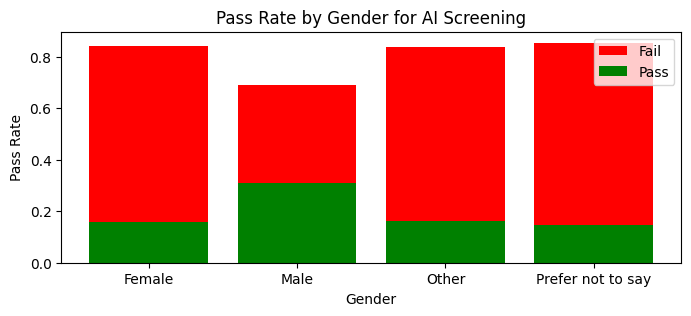

In [103]:
#Pass/fail rate by gender for AI Screening
ai_gender = (
    df.groupby(["gender", "ai_screening"])
    .size()
    .reset_index(name="count")
)

# Compute total for each gender
total_gender = df.groupby("gender").size().reset_index(name="total_count")

# Merge to get pass percentage
ai_gender = ai_gender.merge(total_gender, on="gender", how="left")
ai_gender["pass_rate"] = ai_gender["count"] / ai_gender["total_count"]

print(ai_gender)

plt.figure(figsize=(8, 3))
bars = plt.bar(
    ai_gender["gender"], ai_gender["pass_rate"], color=["red", "green"]
)
plt.xlabel("Gender")
plt.ylabel("Pass Rate")
plt.title("Pass Rate by Gender for AI Screening")
plt.legend(bars, ["Fail", "Pass"], loc="upper right")
plt.show()

/var/folders/yh/n1v6qzmn0ng8x7y4gr7jsqfm0000gn/T/ipykernel_61726/1799705545.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["age_group", "ai_screening"])
/var/folders/yh/n1v6qzmn0ng8x7y4gr7jsqfm0000gn/T/ipykernel_61726/1799705545.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_age_group = df.groupby("age_group").size().reset_index(name="total_count")


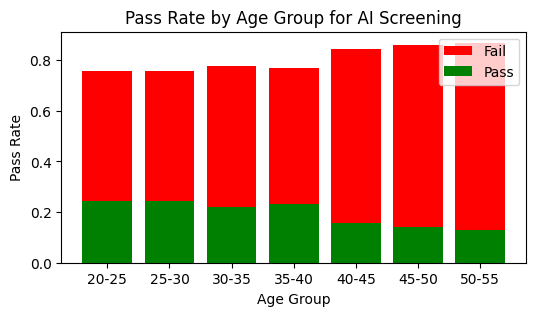

In [122]:
# Create age groups in 5-year increments
df['age_group'] = pd.cut(df['age'], bins=range(20, 56, 5), right=False, labels=["20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55"])

# Pass/fail rate by age group for AI Screening
ai_age_group = (
    df.groupby(["age_group", "ai_screening"])
    .size()
    .reset_index(name="count")
)

# Compute total for each age group
total_age_group = df.groupby("age_group").size().reset_index(name="total_count")

# Merge to get pass percentage
ai_age_group = ai_age_group.merge(total_age_group, on="age_group", how="left")
ai_age_group["pass_rate"] = ai_age_group["count"] / ai_age_group["total_count"]

#print(ai_age_group)

plt.figure(figsize=(6, 3))
bars = plt.bar(
    ai_age_group["age_group"], ai_age_group["pass_rate"], color=["red", "green"]
)
plt.xlabel("Age Group")
plt.ylabel("Pass Rate")
plt.title("Pass Rate by Age Group for AI Screening")
plt.legend(bars, ["Fail", "Pass"], loc="upper right")
plt.show()

            ethnicity  ai_screening  count  total_count  pass_rate
0               Asian             0   1511         1924   0.785343
1               Asian             1    413         1924   0.214657
2               Black             0   1486         1888   0.787076
3               Black             1    402         1888   0.212924
4            Hispanic             0   1538         2020   0.761386
5            Hispanic             1    482         2020   0.238614
6               Other             0    860         1094   0.786106
7               Other             1    234         1094   0.213894
8   Prefer not to say             0    779          976   0.798156
9   Prefer not to say             1    197          976   0.201844
10              White             0   1640         2098   0.781697
11              White             1    458         2098   0.218303


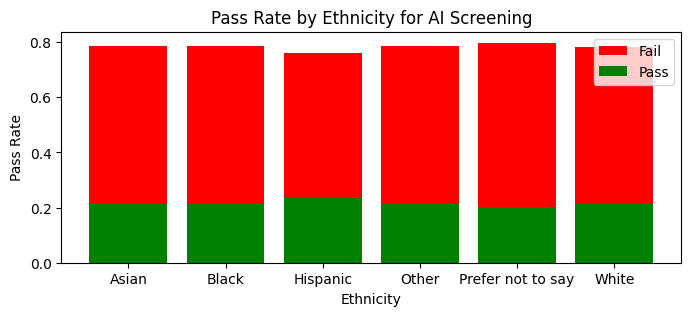

In [101]:
#Pass/fail rate by ethinicity for AI Screening
ai_eth = (
    df.groupby(["ethnicity", "ai_screening"])
    .size()
    .reset_index(name="count")
)

# Compute total for each enthinity
total_eth = df.groupby("ethnicity").size().reset_index(name="total_count")

# Merge to get pass percentage
ai_eth = ai_eth.merge(total_eth, on="ethnicity", how="left")
ai_eth["pass_rate"] = ai_eth["count"] / ai_eth["total_count"]

print(ai_eth)

plt.figure(figsize=(8, 3))
bars = plt.bar(
    ai_eth["ethnicity"], ai_eth["pass_rate"], color=["red", "green"]
)
plt.xlabel("Ethnicity")
plt.ylabel("Pass Rate")
plt.title("Pass Rate by Ethnicity for AI Screening")
plt.legend(bars, ["Fail", "Pass"], loc="upper right")
plt.show()

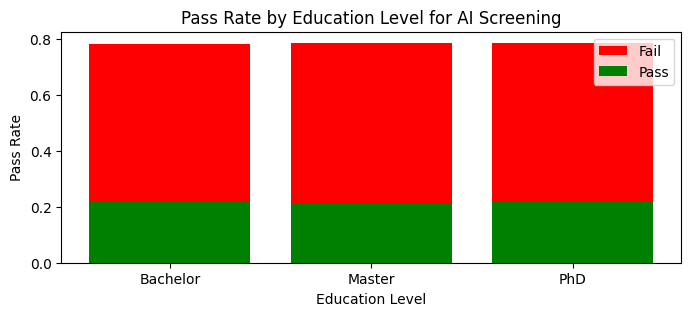

In [100]:
#Pass/fail rate by education level for AI Screening
ai_edu = (
    df.groupby(["education_level", "ai_screening"])
    .size()
    .reset_index(name="count")
)

# Compute total for each enthinity
total_edu = df.groupby("education_level").size().reset_index(name="total_count")

# Merge to get pass percentage
ai_edu = ai_edu.merge(total_edu, on="education_level", how="left")
ai_edu["pass_rate"] = ai_edu["count"] / ai_edu["total_count"]

#print(ai_edu)

plt.figure(figsize=(8, 3))
bars = plt.bar(
    ai_edu["education_level"], ai_edu["pass_rate"], color=["red", "green"]
)
plt.xlabel("Education Level")
plt.ylabel("Pass Rate")
plt.title("Pass Rate by Education Level for AI Screening")
plt.legend(bars, ["Fail", "Pass"], loc="upper right")
plt.show()

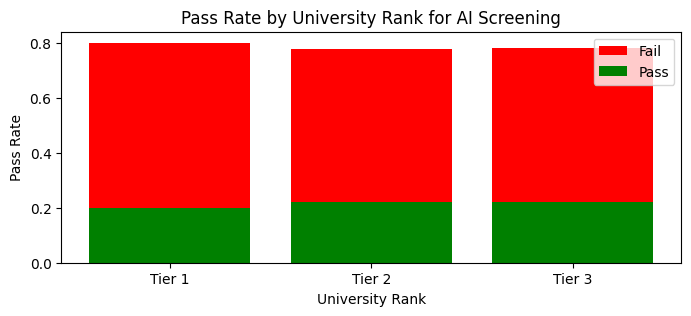

In [99]:
#Pass/fail rate by education level for AI Screening
ai_uni = (
    df.groupby(["university_rank", "ai_screening"])
    .size()
    .reset_index(name="count")
)

# Compute total for each enthinity
total_uni = df.groupby("university_rank").size().reset_index(name="total_count")

# Merge to get pass percentage
ai_uni = ai_uni.merge(total_uni, on="university_rank", how="left")
ai_uni["pass_rate"] = ai_uni["count"] / ai_uni["total_count"]

#print(ai_edu)

plt.figure(figsize=(8, 3))
bars = plt.bar(
    ai_uni["university_rank"], ai_uni["pass_rate"], color=["red", "green"]
)
plt.xlabel("University Rank")
plt.ylabel("Pass Rate")
plt.title("Pass Rate by University Rank for AI Screening")
plt.legend(bars, ["Fail", "Pass"], loc="upper right")
plt.show()

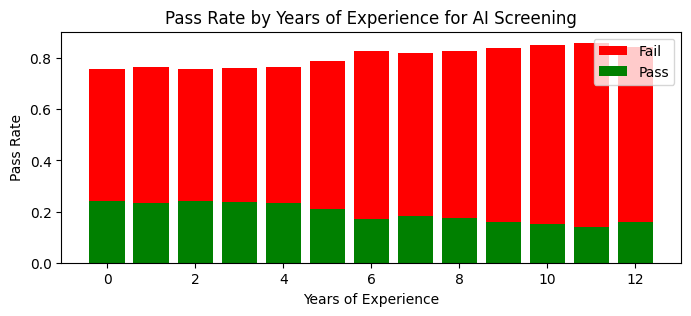

In [104]:
#Pass/fail rate by education level for AI Screening
ai_exp = (
    df.groupby(["years_experience", "ai_screening"])
    .size()
    .reset_index(name="count")
)

# Compute total for each enthinity
total_exp = df.groupby("years_experience").size().reset_index(name="total_count")

# Merge to get pass percentage
ai_exp = ai_exp.merge(total_exp, on="years_experience", how="left")
ai_exp["pass_rate"] = ai_exp["count"] / ai_exp["total_count"]

#print(ai_edu)

plt.figure(figsize=(8, 3))
bars = plt.bar(
    ai_exp["years_experience"], ai_exp["pass_rate"], color=["red", "green"]
)
plt.xlabel("Years of Experience")
plt.ylabel("Pass Rate")
plt.title("Pass Rate by Years of Experience for AI Screening")
plt.legend(bars, ["Fail", "Pass"], loc="upper right")
plt.show()

  rec_gender             gender  count
0     Female             Female     90
1     Female               Male    183
2     Female              Other     25
3     Female  Prefer not to say     16
4       Male             Female    117
5       Male               Male    261
6       Male              Other     33
7       Male  Prefer not to say     41


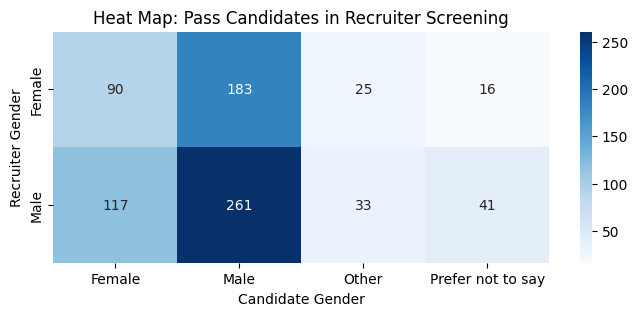

In [107]:
# Filter pass candidates in recruiter screening
pass_rec_screening = filtered_rec_screening_df[filtered_rec_screening_df['rec_screening'] == 1]

# Group by candidate gender and recruiter gender
rec_screening_clusters = (
    pass_rec_screening.groupby(['rec_gender', 'gender'])
    .size()
    .reset_index(name='count')
)

print(rec_screening_clusters)

# Pivot the data for clustering
rec_screening_pivot = rec_screening_clusters.pivot(index='rec_gender', columns='gender', values='count').fillna(0)

# Create a cluster plot
plt.figure(figsize=(8, 3))
sns.heatmap(rec_screening_pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Heat Map: Pass Candidates in Recruiter Screening")
plt.xlabel("Candidate Gender")
plt.ylabel("Recruiter Gender")
plt.show()

  rec_gender             gender  count
0     Female             Female    164
1     Female               Male    311
2     Female              Other     31
3     Female  Prefer not to say     36
4       Male             Female    254
5       Male               Male    503
6       Male              Other     61
7       Male  Prefer not to say     60


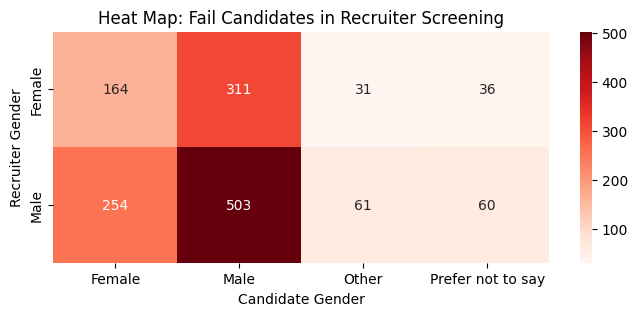

In [108]:
# Filter fail candidates in recruiter screening
fail_rec_screening = filtered_rec_screening_df[filtered_rec_screening_df['rec_screening'] == 0]

# Group by candidate gender and recruiter gender
rec_screening_clusters_fail = (
    fail_rec_screening.groupby(['rec_gender', 'gender'])
    .size()
    .reset_index(name='count')
)

print(rec_screening_clusters_fail)

# Pivot the data for clustering
rec_screening_pivot_fail = rec_screening_clusters_fail.pivot(index='rec_gender', columns='gender', values='count').fillna(0)

# Create a cluster plot
plt.figure(figsize=(8, 3))
sns.heatmap(rec_screening_pivot_fail, annot=True, fmt=".0f", cmap="Reds")
plt.title("Heat Map: Fail Candidates in Recruiter Screening")
plt.xlabel("Candidate Gender")
plt.ylabel("Recruiter Gender")
plt.show()

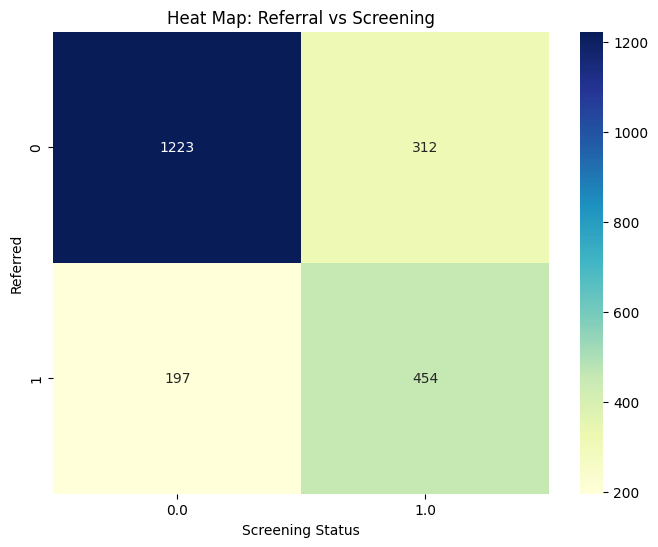

In [14]:
# Group by referral and screening status
referral_screening = (
    filtered_rec_screening_df.groupby(['referred', 'rec_screening'])
    .size()
    .reset_index(name='count')
)

# Pivot the data for heatmap
referral_screening_pivot = referral_screening.pivot(index='referred', columns='rec_screening', values='count').fillna(0)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(referral_screening_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heat Map: Referral vs Screening")
plt.xlabel("Screening Status")
plt.ylabel("Referred")
plt.show()

   rec_ethnicity          ethnicity  count
0          Asian              Asian     63
1          Asian              Black     24
2          Asian           Hispanic     22
3          Asian              Other     15
4          Asian  Prefer not to say     10
5          Asian              White     27
6          Black              Asian     24
7          Black              Black     61
8          Black           Hispanic     23
9          Black              Other      8
10         Black  Prefer not to say      9
11         Black              White     20
12      Hispanic              Asian     15
13      Hispanic              Black     22
14      Hispanic           Hispanic     74
15      Hispanic              Other     17
16      Hispanic  Prefer not to say      5
17      Hispanic              White     22
18         Other              Asian     22
19         Other              Black     20
20         Other           Hispanic     17
21         Other              Other     39
22         

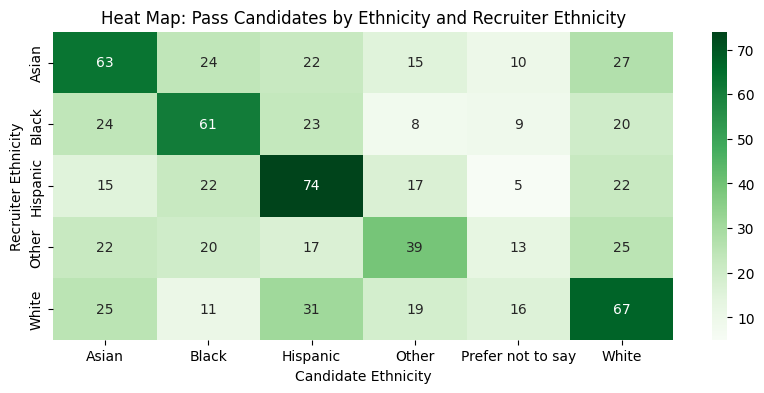

In [117]:
# Filter pass candidates in recruiter screening
pass_rec_screening = filtered_rec_screening_df[filtered_rec_screening_df['rec_screening'] == 1]

# Group by candidate ethnicity and recruiter ethnicity
ethnicity_clusters = (
    pass_rec_screening.groupby(['rec_ethnicity', 'ethnicity'])
    .size()
    .reset_index(name='count')
)

print(ethnicity_clusters)

# Pivot the data for clustering
ethnicity_pivot = ethnicity_clusters.pivot(index='rec_ethnicity', columns='ethnicity', values='count').fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(ethnicity_pivot, annot=True, fmt=".0f", cmap="Greens")
plt.title("Heat Map: Pass Candidates by Ethnicity and Recruiter Ethnicity")
plt.xlabel("Candidate Ethnicity")
plt.ylabel("Recruiter Ethnicity")
plt.show()

/var/folders/yh/n1v6qzmn0ng8x7y4gr7jsqfm0000gn/T/ipykernel_61726/2035723406.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pass_rec_screening.groupby(['age_group', 'rec_age_group'])


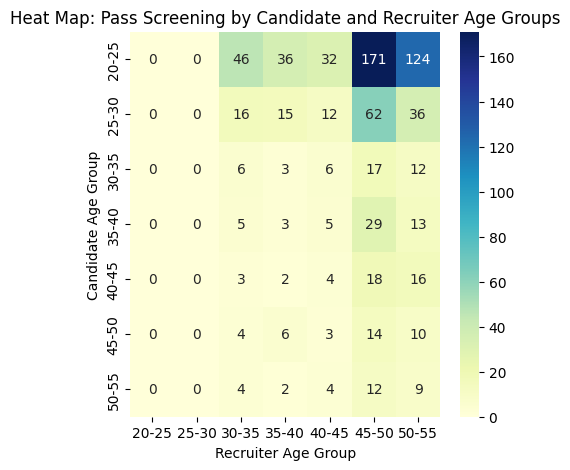

In [121]:
# Create age groups for candidates
filtered_rec_screening_df['age_group'] = pd.cut(
    filtered_rec_screening_df['age'], 
    bins=range(20, 56, 5), 
    right=False, 
    labels=["20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55"]
)

# Create age groups for recruiters
filtered_rec_screening_df['rec_age_group'] = pd.cut(
    filtered_rec_screening_df['rec_age'], 
    bins=range(20, 56, 5), 
    right=False, 
    labels=["20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55"]
)

# Filter pass candidates in recruiter screening
pass_rec_screening = filtered_rec_screening_df[filtered_rec_screening_df['rec_screening'] == 1]

# Group by candidate and recruiter age groups
age_group_clusters = (
    pass_rec_screening.groupby(['age_group', 'rec_age_group'])
    .size()
    .reset_index(name='count')
)

# Pivot the data for clustering
age_group_pivot = age_group_clusters.pivot(index='age_group', columns='rec_age_group', values='count').fillna(0)

# Create a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(age_group_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heat Map: Pass Screening by Candidate and Recruiter Age Groups")
plt.xlabel("Recruiter Age Group")
plt.ylabel("Candidate Age Group")
plt.show()

    years_experience  rec_screening  count  total_count  pass_rate
0                  0            0.0    656          994   0.659960
1                  0            1.0    338          994   0.340040
2                  1            0.0    123          191   0.643979
3                  1            1.0     68          191   0.356021
4                  2            0.0    133          196   0.678571
5                  2            1.0     63          196   0.321429
6                  3            0.0     80          109   0.733945
7                  3            1.0     29          109   0.266055
8                  4            0.0     78          119   0.655462
9                  4            1.0     41          119   0.344538
10                 5            0.0     90          147   0.612245
11                 5            1.0     57          147   0.387755
12                 6            0.0     43           77   0.558442
13                 6            1.0     34           77   0.44

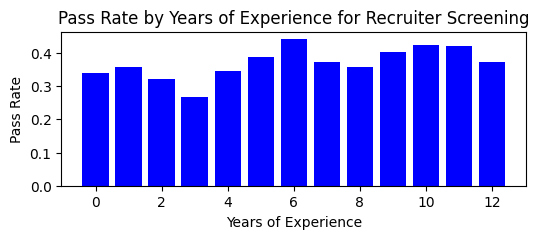

In [128]:
# Pass/fail rate by years of experience for recruiter screening
experience_screening = (
    filtered_rec_screening_df.groupby(["years_experience", "rec_screening"])
    .size()
    .reset_index(name="count")
)

# Compute total for each years of experience
total_experience = filtered_rec_screening_df.groupby("years_experience").size().reset_index(name="total_count")

# Merge to get pass percentage
experience_screening = experience_screening.merge(total_experience, on="years_experience", how="left")
experience_screening["pass_rate"] = experience_screening["count"] / experience_screening["total_count"]

# Display the result
print(experience_screening)

# Plot the pass rate by years of experience
plt.figure(figsize=(6, 2))
bars = plt.bar(
    experience_screening[experience_screening["rec_screening"] == 1]["years_experience"],
    experience_screening[experience_screening["rec_screening"] == 1]["pass_rate"],
    color="blue"
)
plt.xlabel("Years of Experience")
plt.ylabel("Pass Rate")
plt.title("Pass Rate by Years of Experience for Recruiter Screening")
plt.show()

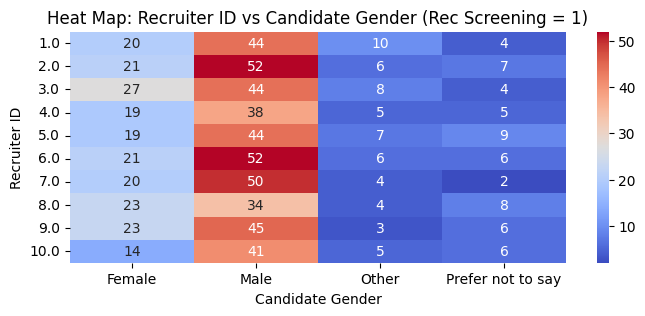

In [109]:
# Filter data where rec_screening = 1
rec_screening_pass = filtered_rec_screening_df[filtered_rec_screening_df['rec_screening'] == 1]

# Group by recruiter_id and candidate gender
recruiter_gender = (
    rec_screening_pass.groupby(['recruiter_id', 'gender'])
    .size()
    .reset_index(name='count')
)

# Pivot the data for heatmap
recruiter_gender_pivot = recruiter_gender.pivot(index='recruiter_id', columns='gender', values='count').fillna(0)

# Create a heatmap
plt.figure(figsize=(8, 3))
sns.heatmap(recruiter_gender_pivot, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Heat Map: Recruiter ID vs Candidate Gender (Rec Screening = 1)")
plt.xlabel("Candidate Gender")
plt.ylabel("Recruiter ID")
plt.show()

    recruiter_id rec_gender
0            3.0     Female
1            1.0     Female
2            6.0       Male
11           7.0     Female
27          10.0       Male
32           8.0       Male
35           9.0     Female
44           2.0       Male
48           4.0       Male
49           5.0       Male


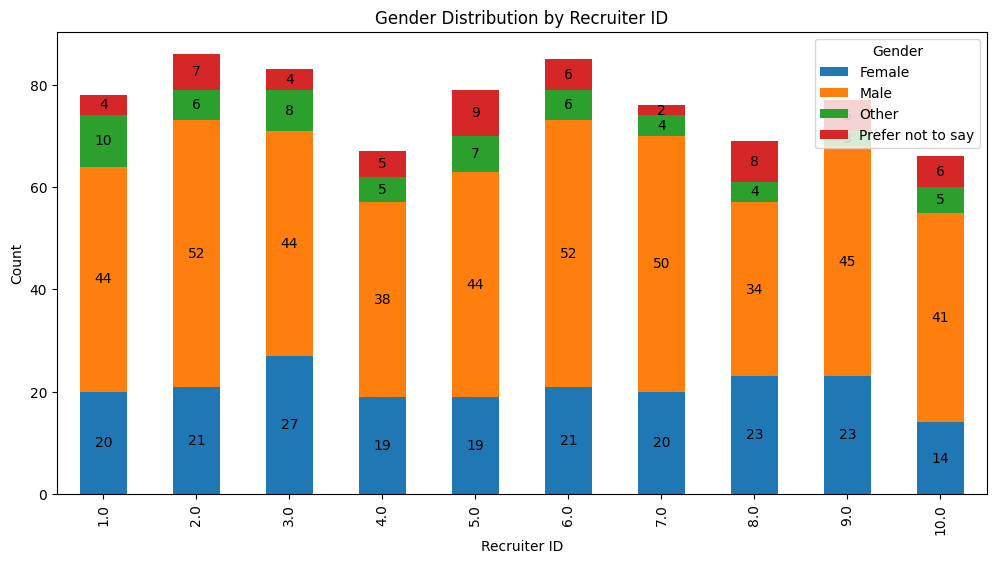

In [ ]:
# List all unique recruiter IDs and their corresponding rec_gender from the dataframe
unique_recruiter_genders = filtered_rec_screening_df[['recruiter_id', 'rec_gender']].drop_duplicates().dropna()

# Print the unique recruiter IDs and their corresponding rec_gender
print(unique_recruiter_genders)

# Group by recruiter_id and rec_gender to count occurrences
recruiter_gender_summary = recruiter_gender.groupby(['recruiter_id', 'gender'])['count'].sum().unstack()

# Plot the data
ax = recruiter_gender_summary.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Gender Distribution by Recruiter ID")
plt.xlabel("Recruiter ID")
plt.ylabel("Count")
plt.legend(title="Gender", loc='upper right')

# Add numeric values on top of each bar segment
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()

In [ ]:
# Number of candidates by gender where rec_screening = 1
gender_rec_screening_pass = filtered_rec_screening_df[filtered_rec_screening_df['rec_screening'] == 1].groupby("gender").size().reset_index(name="count")
print("Number of candidates by gender where rec_screening = 1:")
print(gender_rec_screening_pass)

# Number of candidates by ethnicity where rec_screening = 1
ethnicity_rec_screening_pass = filtered_rec_screening_df[filtered_rec_screening_df['rec_screening'] == 1].groupby("ethnicity").size().reset_index(name="count")
print("\nNumber of candidates by ethnicity where rec_screening = 1:")
print(ethnicity_rec_screening_pass)

Number of candidates by gender where rec_screening = 1:
              gender  count
0             Female    207
1               Male    444
2              Other     58
3  Prefer not to say     57

Number of candidates by ethnicity where rec_screening = 1:
           ethnicity  count
0              Asian    149
1              Black    138
2           Hispanic    167
3              Other     98
4  Prefer not to say     53
5              White    161


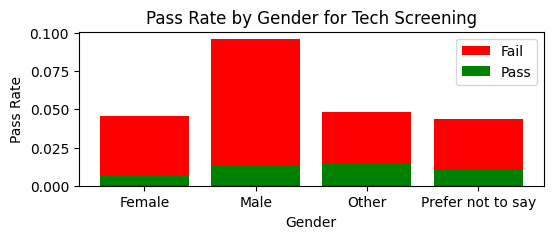

In [112]:
# Pass/fail rate by gender for Tech Screening
tech_gender = (
    df.groupby(["gender", "tech_screening"])
    .size()
    .reset_index(name="count")
)

# Compute total for each gender
total_gender_tech = df.groupby("gender").size().reset_index(name="total_count")

# Merge to get pass percentage
tech_gender = tech_gender.merge(total_gender_tech, on="gender", how="left")
tech_gender["pass_rate"] = tech_gender["count"] / tech_gender["total_count"]

# Plot the pass/fail rate
plt.figure(figsize=(6, 2))
bars = plt.bar(
    tech_gender["gender"], tech_gender["pass_rate"], color=["red", "green"]
)
plt.xlabel("Gender")
plt.ylabel("Pass Rate")
plt.title("Pass Rate by Gender for Tech Screening")
plt.legend(bars, ["Fail", "Pass"], loc="upper right")
plt.show()

              gender  count
0             Female     27
1               Male     54
2              Other     13
3  Prefer not to say     11


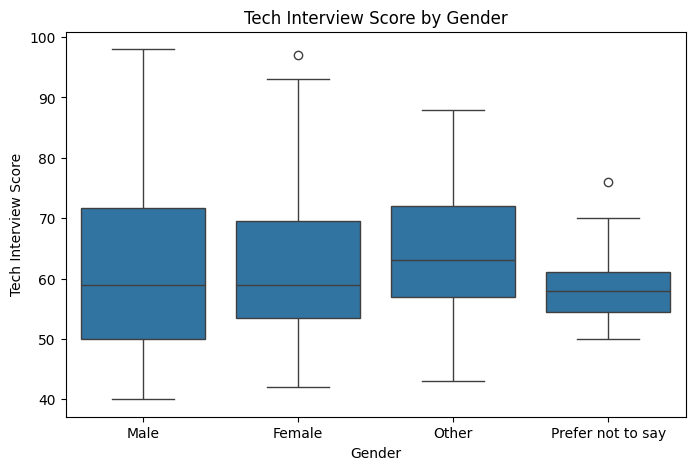

Outliers for Male:
[]
Outliers for Female:
[97.0]
Outliers for Other:
[]
Outliers for Prefer not to say:
[76.0]


In [46]:
# Filter candidates who passed the tech screening
passed_tech_screening = filtered_tech_screening_df[filtered_tech_screening_df["tech_screening"] == 1]

# Count the number of candidates by gender who passed the tech screening
gender_tech_pass_count = passed_tech_screening.groupby("gender").size().reset_index(name="count")
print(gender_tech_pass_count)

# Plot the tech_score of candidates by gender
plt.figure(figsize=(8, 5))
sns.boxplot(x="gender", y="tech_interview_score", data=passed_tech_screening)
plt.xlabel("Gender")
plt.ylabel("Tech Interview Score")
plt.title("Tech Interview Score by Gender")
plt.show()

# Calculate outliers using IQR for each gender
outliers = {}
for gender in passed_tech_screening["gender"].unique():
    gender_scores = passed_tech_screening[passed_tech_screening["gender"] == gender]["tech_interview_score"]
    Q1 = gender_scores.quantile(0.25)
    Q3 = gender_scores.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[gender] = gender_scores[(gender_scores < lower_bound) | (gender_scores > upper_bound)]

# Print outliers
for gender, scores in outliers.items():
    print(f"Outliers for {gender}:")
    print(scores.tolist())

In [ ]:

# Group by ethnicity and calculate avg, max, and min tech_interview_score
ethnicity_tech_scores = passed_tech_screening.groupby("ethnicity")["tech_interview_score"].agg(["mean", "max", "min"]).reset_index()

# Rename columns for clarity
ethnicity_tech_scores.columns = ["ethnicity", "avg_score", "max_score", "min_score"]

# Display the result
print(ethnicity_tech_scores)

           ethnicity  avg_score  max_score  min_score
0              Asian  60.588235       92.0       40.0
1              Black  64.642857       97.0       40.0
2           Hispanic  62.259259       98.0       40.0
3              Other  60.687500       91.0       40.0
4  Prefer not to say  65.000000       70.0       56.0
5              White  61.640000       93.0       41.0


In [66]:
gender_tech_scores = passed_tech_screening.groupby("gender")["tech_interview_score"].agg(["mean", "max", "min"]).reset_index()

# Rename columns for clarity
gender_tech_scores.columns = ["gender", "avg_score", "max_score", "min_score"]

# Display the result
print(gender_tech_scores)

              gender  avg_score  max_score  min_score
0             Female  63.740741       97.0       42.0
1               Male  61.111111       98.0       40.0
2              Other  64.923077       88.0       43.0
3  Prefer not to say  59.363636       76.0       50.0


In [129]:
# Group by age group and calculate avg, min, and max tech_interview_score
age_group_scores = passed_tech_screening.groupby("age_group")["tech_interview_score"].agg(["mean", "min", "max"]).reset_index()

# Rename columns for clarity
age_group_scores.columns = ["age_group", "avg_score", "min_score", "max_score"]

# Display the result
print(age_group_scores)

  age_group  avg_score  min_score  max_score
0     20-25  64.517857       40.0       98.0
1     25-30  62.454545       40.0       92.0
2     30-35  54.166667       43.0       72.0
3     35-40  61.600000       57.0       70.0
4     40-45  58.272727       40.0       91.0
5     45-50  50.500000       41.0       56.0
6     50-55  55.000000       55.0       55.0


/var/folders/yh/n1v6qzmn0ng8x7y4gr7jsqfm0000gn/T/ipykernel_61726/3836885235.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_scores = passed_tech_screening.groupby("age_group")["tech_interview_score"].agg(["mean", "min", "max"]).reset_index()


    years_experience  avg_score  min_score  max_score
0                  0  65.941176       40.0       98.0
1                  1  55.727273       40.0       85.0
2                  2  50.666667       40.0       59.0
3                  3  69.333333       50.0       92.0
4                  4  64.333333       55.0       76.0
5                  5  59.750000       43.0       88.0
6                  6  56.000000       53.0       59.0
7                  7  53.500000       40.0       72.0
8                  8  63.333333       57.0       70.0
9                  9  41.000000       41.0       41.0
10                10  53.500000       51.0       56.0
11                11  81.500000       72.0       91.0
12                12  56.750000       42.0       70.0


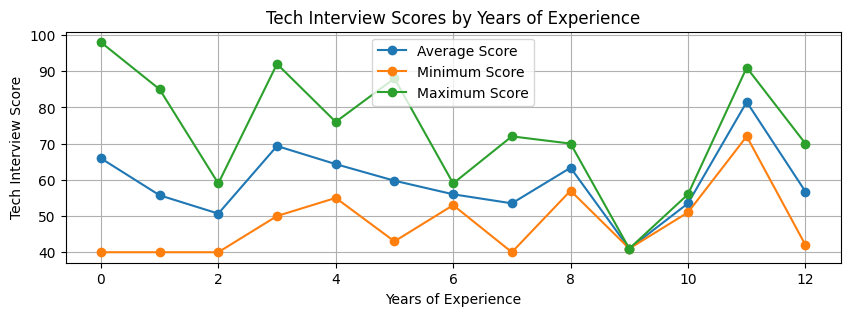

In [134]:
# Group by years of experience and calculate avg, min, and max tech_interview_score
experience_scores = passed_tech_screening.groupby("years_experience")["tech_interview_score"].agg(["mean", "min", "max"]).reset_index()

# Rename columns for clarity
experience_scores.columns = ["years_experience", "avg_score", "min_score", "max_score"]

# Display the result
print(experience_scores)
# Plot the avg, min, and max scores as a line graph
plt.figure(figsize=(10, 3))
plt.plot(experience_scores["years_experience"], experience_scores["avg_score"], label="Average Score", marker="o")
plt.plot(experience_scores["years_experience"], experience_scores["min_score"], label="Minimum Score", marker="o")
plt.plot(experience_scores["years_experience"], experience_scores["max_score"], label="Maximum Score", marker="o")

# Add labels, title, and legend
plt.xlabel("Years of Experience")
plt.ylabel("Tech Interview Score")
plt.title("Tech Interview Scores by Years of Experience")
plt.legend()
plt.grid(True)
plt.show()

Number of candidates by gender who passed management screening:
              gender  count
0             Female      3
1               Male      8
2              Other      4
3  Prefer not to say      5

Number of candidates by ethnicity who passed management screening:
           ethnicity  count
0              Asian      4
1              Black      1
2           Hispanic      5
3              Other      2
4  Prefer not to say      2
5              White      6
Candidate Details:
      candidate_id  age  years_experience             gender  \
1400           701   23                 0             Female   
5641          2821   21                 0             Female   
7394          3698   22                 0             Female   
1411           706   23                 0               Male   
9662          4832   22                 0               Male   
8204          4103   41                11               Male   
257            129   25                 1               Male   
1

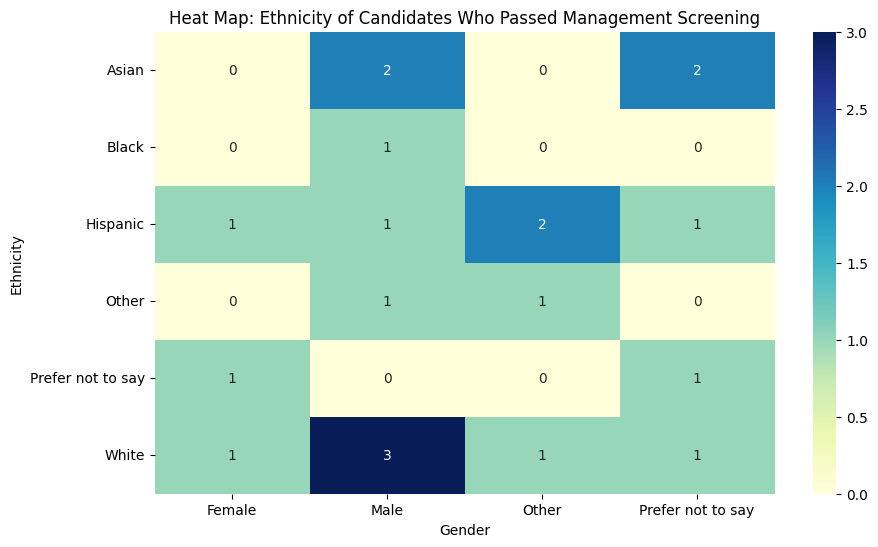

In [119]:
# Count the number of candidates by gender who passed management screening
gender_management_pass_count = passed_management_screening.groupby("gender").size().reset_index(name="count")
print("Number of candidates by gender who passed management screening:")
print(gender_management_pass_count)

# Count the number of candidates by ethnicity who passed management screening
ethnicity_management_pass_count = passed_management_screening.groupby("ethnicity").size().reset_index(name="count")
print("\nNumber of candidates by ethnicity who passed management screening:")
print(ethnicity_management_pass_count)

# Extract relevant columns for candidates who passed management screening
candidate_details = passed_management_screening[["candidate_id","age","years_experience","gender", "ethnicity", "tech_interview_score", "referred"]].sort_values(by=["gender", "ethnicity"])

# Display the details
print("Candidate Details:")
print(candidate_details)

# Group by gender and ethnicity for candidates who passed management screening
gender_ethnicity_pass = (
    passed_management_screening.groupby(['gender', 'ethnicity'])
    .agg(count=('gender', 'size'), avg_score=('tech_interview_score', 'mean'))
    .reset_index()
)

# Pivot the data for heatmap
ethnicity_pass_pivot = gender_ethnicity_pass.pivot(index='ethnicity', columns='gender', values='count').fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    ethnicity_pass_pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True
)
plt.title("Heat Map: Ethnicity of Candidates Who Passed Management Screening")
plt.xlabel("Gender")
plt.ylabel("Ethnicity")
plt.show()
